In [218]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import seaborn as sns
import pandas as pd

In [78]:
import re
from pathlib import Path
import requests
import random
import time
import scipy
from bs4 import BeautifulSoup
import shutil

In [53]:
html_file = open("../data/willoughbys_beach.htm", "r", encoding='utf-8') 

#index = html_file.read(encoding="utf8")
  
# Creating a BeautifulSoup object and specifying the parser 
soup = BeautifulSoup(html_file, 'lxml') 
html_file.close()

In [54]:
song_objects = soup.find_all('yt-formatted-string', 
              {'class':"title style-scope ytmusic-responsive-list-item-renderer complex-string"})
play_objects = soup.find_all('yt-formatted-string', 
              {'class':"flex-column style-scope ytmusic-responsive-list-item-renderer"})
titles = [song_object['title'] for song_object in song_objects]
plays = [song_object['title'] for song_object in play_objects]


In [55]:
def num_plays(play_str):
    play_str = play_str.split(' plays')[0]
    if play_str[-1] == 'K':
        mult = 1_000
    elif play_str[-1] == 'M':
        mult = 1_000_000
    else:
        mult = 1
    play_str = re.sub("[^0-9.]", "", play_str)
    return float(play_str)*mult

In [56]:
plays

['27K plays',
 '135K plays',
 '20K plays',
 '20K plays',
 '20K plays',
 '126K plays',
 '23K plays',
 '13K plays',
 '22K plays']

In [18]:
soup.find_all('yt-formatted-string', 
              {'class':"flex-column style-scope ytmusic-responsive-list-item-renderer"})

[<yt-formatted-string class="flex-column style-scope ytmusic-responsive-list-item-renderer" ellipsis-truncate="" ellipsis-truncate-styling="" respect-html-dir="" title="989K plays">989K plays</yt-formatted-string>,
 <yt-formatted-string class="flex-column style-scope ytmusic-responsive-list-item-renderer" ellipsis-truncate="" ellipsis-truncate-styling="" respect-html-dir="" title="591K plays">591K plays</yt-formatted-string>,
 <yt-formatted-string class="flex-column style-scope ytmusic-responsive-list-item-renderer" ellipsis-truncate="" ellipsis-truncate-styling="" respect-html-dir="" title="490K plays">490K plays</yt-formatted-string>,
 <yt-formatted-string class="flex-column style-scope ytmusic-responsive-list-item-renderer" ellipsis-truncate="" ellipsis-truncate-styling="" respect-html-dir="" title="692K plays">692K plays</yt-formatted-string>,
 <yt-formatted-string class="flex-column style-scope ytmusic-responsive-list-item-renderer" ellipsis-truncate="" ellipsis-truncate-styling="

In [57]:
def process_album_data(filename):
    html_file = open(filename, "r", encoding='utf-8')
    soup = BeautifulSoup(html_file, 'lxml') 
    html_file.close()
    song_objects = soup.find_all('yt-formatted-string', 
              {'class':"title style-scope ytmusic-responsive-list-item-renderer complex-string"})
    play_objects = soup.find_all('yt-formatted-string', 
              {'class':"flex-column style-scope ytmusic-responsive-list-item-renderer"})
    titles = [song_object['title'] for song_object in song_objects]
    plays = [song_object['title'] for song_object in play_objects]
    plays = [num_plays(play) for play in plays]
    result_df = pd.DataFrame({'title':titles, 'plays':plays})
    return result_df

In [398]:
process_album_data('../data/silver.htm')

,title,plays
0,Theia,170000.0
1,The Silver Cord,509000.0
2,Set,148000.0
3,Chang’e,117000.0
4,Gilgamesh,86000.0
5,Swan Song,134000.0
6,Extinction,92000.0
7,Theia (Extended Mix),73000.0
8,The Silver Cord (Extended Mix),74000.0
9,Set (Extended Mix),49000.0


In [356]:
album_data = pd.read_csv('../data/album_data.csv', encoding='latin')

In [400]:
song_df.sort_values('year_weight')

,title,plays,prefix,album_display_name,year,year_weight,popularity_weight,hybrid_weight
1,Black Tooth,135000.0,willoughbys,Willoughby's Beach,2011,0.001329,0.001014,0.001172
8,Willoughby's Beach,22000.0,willoughbys,Willoughby's Beach,2011,0.001329,0.000165,0.000747
7,Stoned Mullet,13000.0,willoughbys,Willoughby's Beach,2011,0.001329,0.000098,0.000713
6,Dustbin Fletcher,23000.0,willoughbys,Willoughby's Beach,2011,0.001329,0.000173,0.000751
5,Dead-Beat,126000.0,willoughbys,Willoughby's Beach,2011,0.001329,0.000947,0.001138
...,...,...,...,...,...,...,...,...
5,Le Risque,812000.0,b741,Flight b741,2024,0.018605,0.006102,0.012353
6,Flight b741,24000.0,b741,Flight b741,2024,0.018605,0.000180,0.009393
7,Sad Pilot,21000.0,b741,Flight b741,2024,0.018605,0.000158,0.009381
8,Rats In The Sky,18000.0,b741,Flight b741,2024,0.018605,0.000135,0.009370


In [357]:
album_data = pd.read_csv('../data/album_data.csv', encoding='latin')

def process_album_data(filename):
    html_file = open(filename, "r", encoding='utf-8')
    soup = BeautifulSoup(html_file, 'lxml') 
    html_file.close()
    song_objects = soup.find_all('yt-formatted-string', 
              {'class':"title style-scope ytmusic-responsive-list-item-renderer complex-string"})
    play_objects = soup.find_all('yt-formatted-string', 
              {'class':"flex-column style-scope ytmusic-responsive-list-item-renderer"})
    titles = [song_object['title'] for song_object in song_objects]
    plays = [song_object['title'] for song_object in play_objects]
    plays = [num_plays(play) for play in plays]
    result_df = pd.DataFrame({'title':titles, 'plays':plays})
    return result_df

def num_plays(play_str):
    play_str = play_str.split(' plays')[0]
    if play_str[-1] == 'K':
        mult = 1_000
    elif play_str[-1] == 'M':
        mult = 1_000_000
    else:
        mult = 1
    play_str = re.sub("[^0-9.]", "", play_str)
    return float(play_str)*mult

collect = []
for index, row in album_data.iterrows():
    # get song data
    prefix = row['prefix']
    display_name = row['full album']
    year = row['Year']
    
    result_df = process_album_data('../data/' + prefix + '.htm')
    result_df['prefix'] = prefix
    result_df['album_display_name'] = display_name
    result_df['year'] = year
    collect.append(result_df)
    
    # get album cover
    shutil.copy('../data/' + prefix + '_files/unnamed.jpg', '../album_covers/' + prefix + '.jpg')
    
song_df = pd.concat(collect)
song_df = song_df[~song_df['title'].str.contains('(Extended Mix)')].copy()
song_df['year_weight'] = 1/(2025 - song_df['year'])

song_df['year_weight'] = 1/(2025 - song_df['year'])
song_df['year_weight'] = song_df['year_weight']/np.sum(song_df['year_weight'])
song_df['popularity_weight'] = song_df['plays']
song_df['popularity_weight'] = song_df['popularity_weight']/np.sum(song_df['popularity_weight'])
song_df['hybrid_weight'] = (song_df['popularity_weight'] + song_df['year_weight']) / 2

song_df.to_csv('../data/song_data.csv', index=False)

C:\Users\richa\AppData\Local\Temp\ipykernel_13660\877118920.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  song_df = song_df[~song_df['title'].str.contains('(Extended Mix)')].copy()


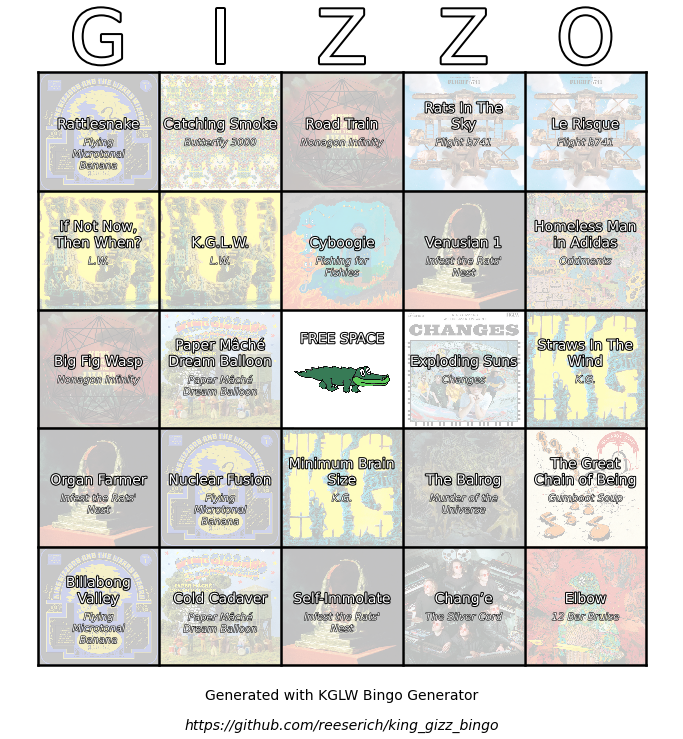

In [363]:
np.random.seed(None)

weight = 'hybrid'
top_word = 'GIZZO'
album_covers = True

album_dict = dict(zip(song_df['title'], song_df['album_display_name']))
prefix_dict = dict(zip(song_df['title'], song_df['prefix']))

song_selection = np.random.choice(a=song_df['title'], size=25, replace=False, p=song_df[weight + '_weight'])
song_selection = song_selection.reshape(5, 5)

fig = plt.figure(figsize=(12,12))
ax = plt.gca()
#ax.set_aspect('equal')

line_positions = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]

for x in line_positions:
    ax.plot([x, x], [-0.5,4.5], color='k', linewidth=2.5)
    ax.plot([-0.5,4.5], [x,x], color='k', linewidth=2.5)
    
song_selection[2][2] = 'FREE SPACE'
    
ax.axis('off')
for i in range(5):
    for j in range(5):
        if (i == 2) & (j == 2):
            pass
        else:
            song_name = song_selection[i][j]
            album_name = album_dict.get(song_name)
            prefix = prefix_dict.get(song_name)
            ax.text(s='\n'.join(textwrap.wrap(song_name, 14)), x=i, y=j, color='w',
                    va='bottom', ha='center', fontsize=14, 
                    path_effects=[path_effects.withStroke(linewidth=2, foreground="k")])
            ax.text(s='\n'.join(textwrap.wrap(album_name, 16)), x=i, y=j-0.05, color='w',
                    va='top', ha='center', fontsize=10, style='italic',
                    path_effects=[path_effects.withStroke(linewidth=1, foreground="k")])
            if album_covers:
                image = mpl.image.imread('../album_covers/' + prefix + '.jpg')   
                imagebox = mpl.offsetbox.OffsetImage(image, zoom=0.22, alpha=0.25)
                ab = mpl.offsetbox.AnnotationBbox(imagebox, xy=(i,j), xycoords='data', 
                                                  frameon = False, zorder=-1)
                ax.add_artist(ab)
if album_covers:            
    image = mpl.image.imread('../album_covers/gator.jpg')        
    imagebox = mpl.offsetbox.OffsetImage(image, zoom=0.04, alpha=1)
    ab = mpl.offsetbox.AnnotationBbox(imagebox, xy=(2,1.9), xycoords='data', 
                                                  frameon = False, zorder=-1)
    ax.add_artist(ab)
            
ax.text(s='FREE SPACE', x=2, y=2.25, color='w',
                va='center', ha='center', fontsize=14, 
                path_effects=[path_effects.withStroke(linewidth=2, foreground="k")])

ax.text(s=top_word[0], x=0, y=4.75, ha='center', va='center', fontsize=74, color='w',
                    path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])
ax.text(s=top_word[1], x=1, y=4.75, ha='center', va='center', fontsize=74, color='w',
                    path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])
ax.text(s=top_word[2], x=2, y=4.75, ha='center', va='center', fontsize=74, color='w',
                    path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])
ax.text(s=top_word[3], x=3, y=4.75, ha='center', va='center', fontsize=74, color='w',
                    path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])
ax.text(s=top_word[4], x=4, y=4.75, ha='center', va='center', fontsize=74, color='w',
                    path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])

ax.text(s='Generated with KGLW Bingo Generator', x=2, y=-0.75, fontsize=14, va='center', ha='center')
ax.text(s='https://github.com/reeserich/king_gizz_bingo', x=2, y=-1, fontsize=14, 
        va='center', ha='center', style='italic')

fig.savefig('../output/test.pdf', bbox_inches='tight')

In [394]:
np.random.seed(None)

weight = 'hybrid'
top_word = 'GIZZO'
album_covers = True

def kglw_bingo(song_df, filename='output', top_word='GIZZO', album_covers=True, weight='hybrid', seed=None):
    
    np.random.seed(seed)

    album_dict = dict(zip(song_df['title'], song_df['album_display_name']))
    prefix_dict = dict(zip(song_df['title'], song_df['prefix']))
    
    if weight == 'none':
        song_selection = np.random.choice(a=song_df['title'], size=25, replace=False)
    else:
        song_selection = np.random.choice(a=song_df['title'], size=25, replace=False, p=song_df[weight + '_weight'])
    song_selection = song_selection.reshape(5, 5)

    fig = plt.figure(figsize=(12,12))
    ax = plt.gca()
    #ax.set_aspect('equal')

    line_positions = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]

    for x in line_positions:
        ax.plot([x, x], [-0.5,4.5], color='k', linewidth=2.5)
        ax.plot([-0.5,4.5], [x,x], color='k', linewidth=2.5)

    song_selection[2][2] = 'FREE SPACE'

    ax.axis('off')
    for i in range(5):
        for j in range(5):
            if (i == 2) & (j == 2):
                pass
            else:
                song_name = song_selection[i][j]
                album_name = album_dict.get(song_name)
                prefix = prefix_dict.get(song_name)
                ax.text(s='\n'.join(textwrap.wrap(song_name, 14)), x=i, y=j, color='w',
                        va='bottom', ha='center', fontsize=14, 
                        path_effects=[path_effects.withStroke(linewidth=2, foreground="k")])
                ax.text(s='\n'.join(textwrap.wrap(album_name, 16)), x=i, y=j-0.05, color='w',
                        va='top', ha='center', fontsize=10, style='italic',
                        path_effects=[path_effects.withStroke(linewidth=1, foreground="k")])
                if album_covers:
                    image = mpl.image.imread('../album_covers/' + prefix + '.jpg')   
                    imagebox = mpl.offsetbox.OffsetImage(image, zoom=0.22, alpha=0.25)
                    ab = mpl.offsetbox.AnnotationBbox(imagebox, xy=(i,j), xycoords='data', 
                                                      frameon = False, zorder=-1)
                    ax.add_artist(ab)
    if album_covers:            
        image = mpl.image.imread('../album_covers/gator.jpg')        
        imagebox = mpl.offsetbox.OffsetImage(image, zoom=0.04, alpha=1)
        ab = mpl.offsetbox.AnnotationBbox(imagebox, xy=(2,1.9), xycoords='data', 
                                                      frameon = False, zorder=-1)
        ax.add_artist(ab)

    ax.text(s='FREE SPACE', x=2, y=2.25, color='w',
                    va='center', ha='center', fontsize=14, 
                    path_effects=[path_effects.withStroke(linewidth=2, foreground="k")])

    ax.text(s=top_word[0], x=0, y=4.75, ha='center', va='center', fontsize=74, color='w',
                        path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])
    ax.text(s=top_word[1], x=1, y=4.75, ha='center', va='center', fontsize=74, color='w',
                        path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])
    ax.text(s=top_word[2], x=2, y=4.75, ha='center', va='center', fontsize=74, color='w',
                        path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])
    ax.text(s=top_word[3], x=3, y=4.75, ha='center', va='center', fontsize=74, color='w',
                        path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])
    ax.text(s=top_word[4], x=4, y=4.75, ha='center', va='center', fontsize=74, color='w',
                        path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])

    ax.text(s='Generated with KGLW Bingo Generator (weighting: ' + weight + ', seed: ' + str(seed) + ')', 
            x=2, y=-0.75, fontsize=14, va='center', ha='center')
    ax.text(s='https://github.com/reeserich/king_gizz_bingo', x=2, y=-1, fontsize=14, 
            va='center', ha='center', style='italic')

    fig.savefig('../output/' + filename + '.pdf', bbox_inches='tight')
    #fig.savefig('../output/' + filename + '.png', bbox_inches='tight', dpi=100)

In [262]:
image = mpl.image.imread('../album_covers/gator.jpg')

In [397]:
textwrap.wrap('CHUUUUU', 4)

['CHUU', 'UUU']

In [ ]:
for weight in ['popularity', 'year', 'hybrid', 'none']:
    for index in range(25):
        kglw_bingo(song_df, 
                   filename=weight+'_'+str(index), 
                   top_word='GIZZO', 
                   album_covers=True, 
                   weight=weight, seed=index)

In [365]:
!python ../src/generate_song_data.py

C:\Users\richa\Documents\GitHub\king_gizz_bingo\src\generate_song_data.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  song_df = song_df[~song_df['title'].str.contains('(Extended Mix)')].copy()


In [389]:
!python ../src/generate_bingo.py -f test_0 -t BINGO -w popularity